In [ ]:
# If you are running this notebook in Google Colab, run this cell to mount your Google Drive
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!pip install Bio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.2/279.2 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 48.5 MB/s eta 0:00:00


In [ ]:
PATH = ''

In [ ]:
from Bio import SeqIO
import pandas as pd

def fasta_to_df(fasta_file):
    data = []

    for record in SeqIO.parse(fasta_file, "fasta"):
        row = {'ID': record.id, 'PROTEIN': str(record.seq)}
        for key, value in record.annotations.items():
            row[key] = value
        data.append(row)

    df = pd.DataFrame(data)
    return df

fasta_file = PATH + "uniprot-compressed_true_download_true_format_fasta_query__2A_20AND_2-2022.07.01-07.13.49.42.fasta"
df = fasta_to_df(fasta_file)


In [ ]:
df

,ID,PROTEIN
0,sp|A0A024RBG1|NUD4B_HUMAN,MMKFKPNQTRTYDREGFKKRAACLCFRSEQEDEVLLVSSSRYPDQW...
1,sp|A0A087X1C5|CP2D7_HUMAN,MGLEALVPLAMIVAIFLLLVDLMHRHQRWAARYPPGPLPLPGLGNL...
2,sp|A0A0B4J2F0|PIOS1_HUMAN,MFRRLTFAQLLFATVLGIAGGVYIFQPVFEQYAKDQKELKEKMQLV...
3,sp|A0A0B4J2F2|SIK1B_HUMAN,MVIMSEFSADPAGQGQGQQKPLRVGFYDIERTLGKGNFAVVKLARH...
4,sp|A0A0C5B5G6|MOTSC_HUMAN,MRWQEMGYIFYPRKLR
...,...,...
20381,sp|Q9Y3F1|TA6P_HUMAN,MSLLWTPQILTISFVSYILSLFPSPFPSCYTSCWFETSITTEKELN...
20382,sp|Q9Y6C7|L3R2A_HUMAN,MAHHSLNTFYIWHNNVLHTHLVFFLPHLLNQPFSRGSFLIWLLLCW...
20383,sp|Q9Y6Z2|CF123_HUMAN,MGTAVGPHHSPAPHDSALPARLLTSDFPYGRSCQIEQVKYSVPDTG...
20384,sp|X6R8D5|GUCNB_HUMAN,MGRKEHESPSQPHMCGWEDSQKPSVPSHGPKTPSCKGVKAPHSSRP...


In [ ]:
df.to_csv('protein.csv', index=False)

In [ ]:
df.Sequence.loc[0]

'MMKFKPNQTRTYDREGFKKRAACLCFRSEQEDEVLLVSSSRYPDQWIVPGGGMEPEEEPGGAAVREVYEEAGVKGKLGRLLGIFEQNQDRKHRTYVYVLTVTEILEDWEDSVNIGRKREWFKVEDAIKVLQCHKPVHAEYLEKLKLGCSPANGNSTVPSLPDNNALFVTAAQTSGLPSSVR'

In [ ]:
BINDING_DB_PATH = PATH + "BindingDB_All_202310_tsv.zip"

usecols = ['BindingDB Target Chain Sequence']
binding_db = pd.read_csv(BINDING_DB_PATH, compression='zip', sep='\t', usecols = usecols)
binding_db.drop_duplicates(subset=usecols, inplace=True) # drop the duplicates
binding_db

,BindingDB Target Chain Sequence
0,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMSLPGRWKPKM...
34,PQITLWKRPIVTVKIGGQLREALLDTGADDTVLEDINLPGKWKPKM...
142,MALIPDLAMETWLLLAVSLVLLYLYGTHSHGLFKKLGIPGPTPLPF...
144,MAALRQPQVAELLAEARRAFREEFGAEPELAVSAPGRVNLIGEHTD...
168,PQITLWQRPLVTIKIGGQLKEALLDTGADDTVLEEMNLPGRWKPKM...
...,...
2771673,MAAQQRDCGGAAQLAGPAAEADPLGRFTCPVCLEVYEKPVQVPCGH...
2771851,MERDEPPPSGGGGGGGSAGFLEPPAALPPPPRNGFCQDELAELDPG...
2771929,MALLHSGRVLPGIAAAFHPGLAAAASARASSWWTHVEMGPPDPILG...
2772386,MNFIKDNSRALIQRMGMTVIKQITDDLFVWNVLNREEVNIICCEKV...


In [ ]:
davis_dir = PATH + 'davis.txt'
davis = pd.read_csv(davis_dir, header=None, sep=' ')

kiba_dir = PATH + 'kiba.txt'
kiba = pd.read_csv(kiba_dir, header=None, sep=' ')

davis.columns  = ['drug_id', 'prot_id', 'drug_smile', 'prot_seq', 'label']
kiba.columns  = ['drug_id', 'prot_id', 'drug_smile', 'prot_seq', 'label']

In [ ]:
davis

,drug_id,prot_id,drug_smile,prot_seq,label
0,11314340,AAK1,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQV...,7.366532
1,11314340,ABL1(E255K),CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,5.000000
2,11314340,ABL1(F317I),CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,5.000000
3,11314340,ABL1(F317I)p,CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,5.000000
4,11314340,ABL1(F317L),CC1=C2C=C(C=CC2=NN1)C3=CC(=CN=C3)OCC(CC4=CC=CC...,PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...,5.000000
...,...,...,...,...,...
30051,151194,YES,C1=CC=C2C(=C1)C(=NN=C2NC3=CC=C(C=C3)Cl)CC4=CC=...,MGCIKSKENKSPAIKYRPENTPEPVSTSVSHYGAEPTTVSPCPSSS...,5.000000
30052,151194,YSK1,C1=CC=C2C(=C1)C(=NN=C2NC3=CC=C(C=C3)Cl)CC4=CC=...,MAHLRGFANQHSRVDPEELFTKLDRIGKGSFGEVYKGIDNHTKEVV...,5.000000
30053,151194,YSK4,C1=CC=C2C(=C1)C(=NN=C2NC3=CC=C(C=C3)Cl)CC4=CC=...,MSSMPKPERHAESLLDICHDTNSSPTDLMTVTKNQNIILQSISRSE...,5.721246
30054,151194,ZAK,C1=CC=C2C(=C1)C(=NN=C2NC3=CC=C(C=C3)Cl)CC4=CC=...,MSSLGASFVQIKFDDLQFFENCGGGSFGSVYRAKWISQDKEVAVKK...,5.356547


In [ ]:
kiba

,drug_id,prot_id,drug_smile,prot_seq,label
0,CHEMBL1087421,O00141,COC1=C(C=C2C(=C1)CCN=C2C3=CC(=C(C=C3)Cl)Cl)Cl,MTVKTEAAKGTLTYSRMRGMVAILIAFMKQRRMGLNDFIQKIANNS...,11.10000
1,CHEMBL1087421,O14920,COC1=C(C=C2C(=C1)CCN=C2C3=CC(=C(C=C3)Cl)Cl)Cl,MSWSPSLTTQTCGAWEMKERLGTGGFGNVIRWHNQETGEQIAIKQC...,11.10000
2,CHEMBL1087421,O15111,COC1=C(C=C2C(=C1)CCN=C2C3=CC(=C(C=C3)Cl)Cl)Cl,MERPPGLRPGAGGPWEMRERLGTGGFGNVCLYQHRELDLKIAIKSC...,11.10000
3,CHEMBL1087421,P00533,COC1=C(C=C2C(=C1)CCN=C2C3=CC(=C(C=C3)Cl)Cl)Cl,MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFED...,11.10000
4,CHEMBL1087421,P04626,COC1=C(C=C2C(=C1)CCN=C2C3=CC(=C(C=C3)Cl)Cl)Cl,MELAALCRWGLLLALLPPGAASTQVCTGTDMKLRLPASPETHLDML...,11.10000
...,...,...,...,...,...
118249,CHEMBL230654,Q13554,CCCC1=C(NC=N1)CNC2=CC(=C3C(=C2)C(=C(C=N3)C#N)N...,MATTVTCTRFTDEYQLYEDIGKGAFSVVRRCVKLCTGHEYAAKIIN...,10.49794
118250,CHEMBL230654,Q13555,CCCC1=C(NC=N1)CNC2=CC(=C3C(=C2)C(=C(C=N3)C#N)N...,MATTATCTRFTDDYQLFEELGKGAFSVVRRCVKKTSTQEYAAKIIN...,10.49794
118251,CHEMBL230654,Q13557,CCCC1=C(NC=N1)CNC2=CC(=C3C(=C2)C(=C(C=N3)C#N)N...,MASTTTCTRFTDEYQLFEELGKGAFSVVRRCMKIPTGQEYAAKIIN...,10.49794
118252,CHEMBL230654,Q16539,CCCC1=C(NC=N1)CNC2=CC(=C3C(=C2)C(=C(C=N3)C#N)N...,MSQERPTFYRQELNKTIWEVPERYQNLSPVGSGAYGSVCAAFDTKT...,10.49794


In [ ]:
seq = ['prot_seq']
davis_db = davis[['prot_seq']]
kiba_db = kiba[['prot_seq']]

davis_db.drop_duplicates(subset=['prot_seq'], inplace=True)
kiba_db.drop_duplicates(subset=['prot_seq'], inplace=True)

<ipython-input-6-b6369b9d625f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  davis_db.drop_duplicates(subset=['prot_seq'], inplace=True)
<ipython-input-6-b6369b9d625f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kiba_db.drop_duplicates(subset=['prot_seq'], inplace=True)


In [ ]:
davis_db

,prot_seq
0,MKKFFDSRREQGGSGLGSGSSGGGGSTSGLGSGYIGRVFGIGRQQV...
1,PFWKILNPLLERGTYYYFMGQQPGKVLGDQRRPSLPALHFIKGAGK...
16,MVLGTVLLPPNSYGRDQDTSLCCLCTEASESALPDLTDHFASCVED...
17,MVDGVMILPVLIMIALPSPSMEDEKPKVNPKLYMCVCEGLSCGNED...
18,MAESAGASSFFPLVVLLLAGSGGSGPRGVQALLCACTSCLQANYTC...
...,...
437,MGCIKSKENKSPAIKYRPENTPEPVSTSVSHYGAEPTTVSPCPSSS...
438,MAHLRGFANQHSRVDPEELFTKLDRIGKGSFGEVYKGIDNHTKEVV...
439,MSSMPKPERHAESLLDICHDTNSSPTDLMTVTKNQNIILQSISRSE...
440,MSSLGASFVQIKFDDLQFFENCGGGSFGSVYRAKWISQDKEVAVKK...


In [ ]:
kiba_db

,prot_seq
0,MTVKTEAAKGTLTYSRMRGMVAILIAFMKQRRMGLNDFIQKIANNS...
1,MSWSPSLTTQTCGAWEMKERLGTGGFGNVIRWHNQETGEQIAIKQC...
2,MERPPGLRPGAGGPWEMRERLGTGGFGNVCLYQHRELDLKIAIKSC...
3,MRPSGTAGAALLALLAALCPASRALEEKKVCQGTSNKLTQLGTFED...
4,MELAALCRWGLLLALLPPGAASTQVCTGTDMKLRLPASPETHLDML...
...,...
61864,MLGTGPAAATTAATTSSNVSVLQQFASGLKSRNEETRAKAAKELQH...
62300,MVSSQKLEKPIEMGSSEPLPIADGDRRRKKKRRGRATDSLPGKFED...
64287,MRHSKRTYCPDWDDKDWDYGKWRSSSSHKRRKRSHSSAQENKRCKY...
70409,MGDTVVEPAPLKPTSEPTSGPPGNNGGSLLSVITEGVGELSVIDPE...


In [ ]:
from itertools import combinations

df.rename(columns={'Sequence':'prot_seq'}, inplace = True)
binding_db.rename(columns={'BindingDB Target Chain Sequence':'prot_seq'}, inplace = True)

dfs = [df, binding_db, kiba_db, davis_db]
df_names = ['uniprot', 'binding', 'kiba', 'davis']

# Generate all combinations of DataFrame pairs
for (i, df_a), (j, df_b) in combinations(enumerate(dfs), 2):
    set_a = set(df_a['prot_seq'])
    set_b = set(df_b['prot_seq'])
    intersection = set_a.intersection(set_b)

    print(f"Intersection between {df_names[i]} and {df_names[j]}: {len(intersection) if intersection else 'None'}")

Intersection between uniprot and binding: 3140
Intersection between uniprot and kiba: 221
Intersection between uniprot and davis: 334
Intersection between binding and kiba: 222
Intersection between binding and davis: 342
Intersection between kiba and davis: 179


In [ ]:
# import matplotlib.pyplot as plt
# from matplotlib_venn import venn3

df.rename(columns={'Sequence':'prot_seq'}, inplace = True)
binding_db.rename(columns={'BindingDB Target Chain Sequence':'prot_seq'}, inplace = True)

set_uniprot = set(df['prot_seq'])
set_binding_db = set(binding_db['prot_seq'])
set_kiba_db = set(kiba_db['prot_seq'])
set_davis_db = set(davis_db['prot_seq'])

# plt.figure(figsize=(8, 8))
# venn3([set_uniprot, set_binding_db, set_kiba_db, set_davis_db], ('Uniprot', 'BindingDB', 'Kiba', 'Davis'))
# plt.show()

In [ ]:
!pip install upsetplot

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for upsetplot: filename=UpSetPlot-0.9.0-py3-none-any.whl size=24817 sha256=44462fa4bd55c002b165852ea597a40a1df33a1a3c7a0fcf14d0e936aaff805b
  Stored in directory: /root/.cache/pip/wheels/73/42/9f/1c9718ea27f30466d2787e0f7d88a7cb11942e3460c17e0ef6
Successfully built upsetplot


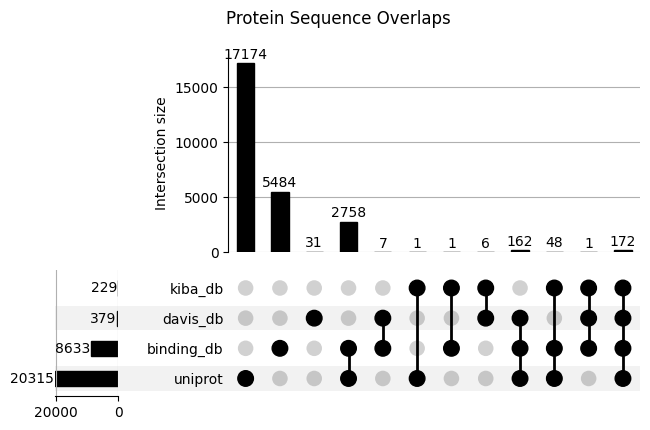

In [ ]:
from upsetplot import UpSet, from_contents
import matplotlib.pyplot as plt

# Assuming 'set_uniprot', 'set_binding_db', 'set_kiba_db', 'set_davis_db' are defined as per your variables

# Prepare the contents dictionary for the from_contents function
contents = {
    'uniprot': set_uniprot,
    'binding_db': set_binding_db,
    'kiba_db': set_kiba_db,
    'davis_db': set_davis_db
}

# Use the from_contents function to prepare your dataset
data = from_contents(contents)

# Create the UpSet plot
upset = UpSet(data, subset_size='count', show_counts=True, sort_by="degree")
upset.plot()
plt.suptitle('Protein Sequence Overlaps')
plt.show()

In [ ]:
!pip install venny4py

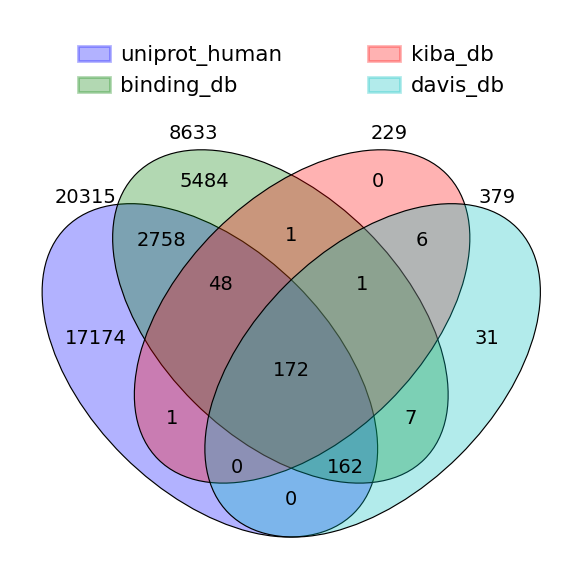

In [ ]:
from venny4py.venny4py import *

#dict of sets
sets = {
    'uniprot_human': set_uniprot,
    'binding_db': set_binding_db,
    'kiba_db': set_kiba_db,
    'davis_db': set_davis_db
}

venny4py(sets=sets)